# Predizione Prezzo Bitcoin
## Autori: Luca Morlino e Valerio Di Zio


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## Descrizione del problema
### Cos'è Bitcoin?
Il Bitcoin è una moneta virtuale creata nel 2009 da uno o più utenti con lo pseudonimo Satoshi Nakamoto. Diversamente dalle altre valute il Bitcoin non ha dietro una Banca centrale che distribuisce nuova moneta ma si basa fondamentalmente su due principi: un network di nodi, cioè di pc, che la gestiscono in modalità distribuita, peer-to-peer; e l'uso di una forte crittografia per validare e rendere sicure le transazioni.
### Obiettivo
L'obiettivo generale è quello di creare un algoritmo che preveda il valore di chiusura di bitcoin a inizio giornata.
Il bitcoin essendo una valuta a tutti gli effetti non ha un orario di apertura né uno di chiusura, per comodità il nostro dataset considera il valore di apertura a mezzanotte e il valore di chiusura a mezzanotte del giorno dopo.

## Estrazione dati
I dati relativi a BTC vengono scaricati dal servizio [Yahoo! Finance](https://it.finance.yahoo.com/).
Per fare ciò viene utilizzata la libreria yfinance che permette l'estrazione di dati in forma di oggetti Python facilmente interrogabili.
In particolare, la usiamo per ottenere i dati storici in forma di Dataframe Pandas

In [2]:
import yfinance

- Creiamo un oggetto Ticker che rappresenta uno specifico titolo o indice
- Nel nostro caso il simbolo del Bitcoin con il suo valore in Euro è BTC-EUR

In [3]:
btc = yfinance.Ticker("BTC-EUR")

- Utilizziamo il metodo history per ottenere i dati storici, partendo dal 1 gennaio 2015 fino a ieri.

In [4]:
from datetime import date

In [5]:
today = date.today().strftime("%Y-%m-%d")
data = btc.history(start="2015-01-02", end=today, actions=False)

Ad esempio, guardiamo i dati relativi agli ultimi 5 giorni. 

Ovviamente i dati odierni non sono presenti, saranno quelli che andremo a prevedere.

In [6]:
data.tail(5)

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-09,28193.755859,28560.138672,28284.824219,28356.046875,20427057156
2022-06-10,28354.476562,28450.841797,27545.003906,27648.169922,28393158151
2022-06-11,27648.988281,27950.578125,26840.496094,26958.935547,25899776264
2022-06-12,26971.011719,27093.796875,25513.984375,25513.984375,32569266905
2022-06-13,25490.082031,25545.843750,21262.470703,21592.951172,65491720208



Andiamo a contare il numero di istanze ricavate

In [7]:
data.size

13605

## Features
Il nostro dataset ha 5 features:
- Open: è il valore in euro di un singolo bitcoin all'orario di apertura
- High: è il valore massimo in euro raggiunto durante la giornata
- Low: è il valore minimo in euro raggiunto durante la giornata
- Close: è il valore in euro di un singolo bitcoin all'orario di chiusura
- Volume: il volume di trading indica (nel nostro caso) il valore in euro di bitcoin scambiati durante la giornata

Per comodità estraiamo una serie per ciascuna colonna, per potersi riferire ad esse con un unico nome.

In [8]:
open = data["Open"]
high = data["High"]
low = data["Low"]
close = data["Close"]
volume = data["Volume"]

La variabile da predire è la features "Close" relativa alla data odierna.

Possiamo tracciare il grafico dell'andamento del prezzo, basandoci sulla feature "Open".

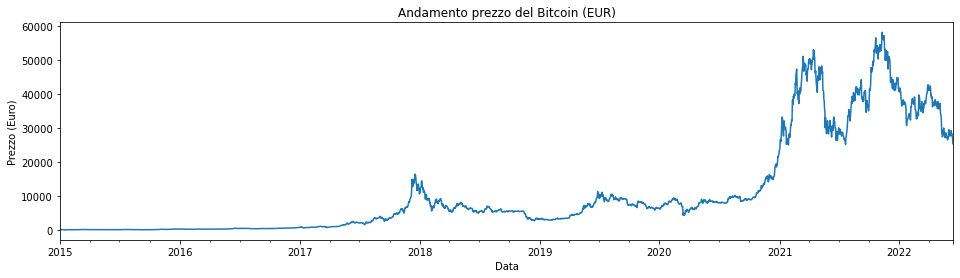

In [9]:
open.plot(figsize=(16,4))
plt.title("Andamento prezzo del Bitcoin (EUR)")
plt.xlabel("Data")
plt.ylabel("Prezzo (Euro)");

Utilizzando la libreria plotly è possibile visualizzare in un unico grafico 4 features (Open, High, Low, Close)

In [10]:
import plotly.graph_objects as go

In [11]:
candlestick = go.Candlestick(
                            x=data.index,
                            open=data['Open'],
                            high=data['High'],
                            low=data['Low'],
                            close=data['Close']
                            )


Il grafico è rappresentato mediante l'utilizzo di Candele, queste ultime rappresentano l'andamento del prezzo di una giornata.

<img src="candlestick.jpeg" alt="Candlestick" style="width:700px;"/>


In [12]:
from ipywidgets.widgets import interact

In [13]:
@interact(ymin=(0,60000,1000), ymax=(0,60000,1000))
def plot_candlestick(ymin=0, ymax=60000):    
    fig = go.Figure(data=[candlestick])
    fig.update_layout(
        width=1000, height=700,
        title="Andamento prezzo Bitcoin Candlestick",
        yaxis_title='Prezzo (EURO)'
    )
    fig.update_xaxes(type="date", range=["2022-05-01", today])
    fig.update_yaxes(range=[ymin,ymax])
    fig.show()

interactive(children=(IntSlider(value=0, description='ymin', max=60000, step=1000), IntSlider(value=60000, des…